# 데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [31]:
base_dir = '/gdrive/MyDrive/colab/202200501_pitcher_ML_classification'

In [32]:
!mkdir {base_dir}

mkdir: cannot create directory ‘/gdrive/MyDrive/colab/202200501_pitcher_ML_classification’: File exists


In [33]:
!ls -al {base_dir}

total 577525
-rw------- 1 root root     97759 May  1 13:13 sample_submission.csv
-rw------- 1 root root 189323249 Mar  9 05:07 test.csv
-rw------- 1 root root 401767146 Mar  9 05:07 train.csv
-rw------- 1 root root    196649 May  1 12:47 train_labels.csv


In [34]:
!cp {base_dir}/*.csv ./

In [1]:
!ls -al

total 577552
drwxr-xr-x 1 root root      4096 May  1 13:14 .
drwxr-xr-x 1 root root      4096 May  1 12:52 ..
drwxr-xr-x 4 root root      4096 Apr 29 03:18 .config
drwxr-xr-x 2 root root      4096 May  1 13:14 .ipynb_checkpoints
drwxr-xr-x 1 root root      4096 Apr 29 03:19 sample_data
-rw------- 1 root root     97759 May  1 13:14 sample_submission.csv
-rw------- 1 root root 189323249 May  1 13:14 test.csv
-rw------- 1 root root 401767146 May  1 13:14 train.csv
-rw------- 1 root root    196649 May  1 13:14 train_labels.csv


In [2]:
!head train.csv

sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,47,0,-0.19629057187017002,0.1123949579831933,1.0,0.3292035398230089,-1.0046596434359805,-0.13163799551234107,-0.12750455373406192,0.36870229007633587,-0.09999999999999999,-0.9638728323699421,-0.9850685568208227,0.5318930041152264,4.7514919011082695
0,47,1,-0.4474497681607419,0.13445378151260506,1.0,-0.6584070796460176,0.16249532477247225,0.3403141361256545,-0.209471766848816,-0.8671755725190838,0.19999999999999998,-0.30130057803468213,0.08273297699279572,-0.2314814814814815,0.45439045183290705
0,47,2,0.32689335394126734,-0.6943277310924371,1.0,0.33008849557522124,0.47367846901882554,1.2804786836200448,-0.0947176684881603,0.5358778625954198,1.4000000000000001,1.0021676300578035,0.44922147339065766,-0.5864197530864198,-4.7361466325660695
0,47,3,0.5231839258114374,0.7510504201680673,1.0,0.9769911504424779,-0.5632869966338362,-0.720269259

In [3]:
!head test.csv

sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
25968,684,0,2.4273570324574965,19.639705882352942,1.0,-1.466371681415929,-1.2899731953621743,-4.207928197456994,2.4863387978142075,-2.493893129770992,8.0,-1.1235549132947977,-1.6730478735765746,10.980452674897121,0.41901108269394716
25968,684,1,-4.950540958268933,-21.747899159663866,1.0,0.9831858407079644,-0.5690531105847151,1.8459237097980552,-3.8879781420765025,1.727480916030534,-2.8999999999999995,0.39523121387283233,-0.8822333255867999,-1.871399176954733,-0.008525149190110827
25968,684,2,1.1360123647604328,-10.756302521008404,1.0,1.0168141592920354,0.9641565889539958,2.4547494390426325,0.3123861566484517,1.1541984732824426,-5.6000000000000005,1.1141618497109826,1.5252730653032767,-11.584362139917696,0.13981244671781753
25968,684,3,0.8060278207109738,6.50420168067227,1.0,-0.179646017699115,0.9692214187757138,-1.0351533283470455,-0.45

In [4]:
!head train_labels.csv

sequence,state
0,0
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,0


In [5]:
!head sample_submission.csv

sequence,state
25968,0
25969,0
25970,0
25971,0
25972,0
25973,0
25974,0
25975,0
25976,0


# 데이터 로딩

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_df = pd.read_csv("train.csv")

In [8]:
train_df

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424


In [9]:
train_label_df = pd.read_csv("train_labels.csv")

In [10]:
train_label_df

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
25963,25963,1
25964,25964,0
25965,25965,1
25966,25966,1


In [11]:
test_df = pd.read_csv("test.csv")
test_df

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.00000,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.00000,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.00000,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812
3,25968,684,3,0.806028,6.504202,1.00000,-0.179646,0.969221,-1.035153,-0.457195,0.254962,-2.7,-0.588873,0.608761,-4.241770,-0.462916
4,25968,684,4,1.288253,5.552521,1.00000,-0.493805,-1.036124,-1.126402,2.008197,-0.730534,0.0,0.899566,-1.259615,-0.472222,-0.121483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733075,38185,773,55,0.211747,2.005252,-1.33282,0.695575,-0.161327,-1.193717,0.421676,0.869466,0.0,-1.536850,0.388101,2.205761,-91.610827
733076,38185,773,56,-0.826121,-2.468487,-1.33282,0.381416,0.144745,1.060583,-0.765938,0.288550,0.2,-1.956647,-0.032158,-1.794239,72.414749
733077,38185,773,57,0.755023,1.469538,-1.33282,-1.253097,-0.414802,0.007479,0.907104,-1.556489,0.4,4.341763,0.150273,0.641975,-34.065644
733078,38185,773,58,-0.187017,0.714286,-1.33282,0.077876,1.323245,0.159312,-0.397996,0.306870,0.1,-1.013728,-0.608616,0.317901,65.659420


In [12]:
train_df.columns

Index(['sequence', 'subject', 'step', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],
      dtype='object')

In [13]:
test_df.columns

Index(['sequence', 'subject', 'step', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],
      dtype='object')

1개의 데이터는 60줄로 구성되어 있다.

sequence가 데이터 id이다. 

subject는 뭔지 모르겠고.

step은 1개 데이터 내에서의 순서이고.

센서가 모두 12개 있고, 투수 공을 60번 순차적으로 센싱한 것이다.

<br>

결론적으로 1개이 데이터는 12*60개 속성으로 구성되었다.



In [14]:
STEP_SIZE = 60
SENSOR_COUNT = 13

# 각 컬럼의 histogram 보기

sequence


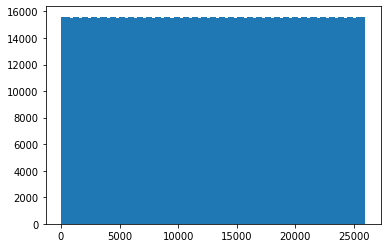

subject


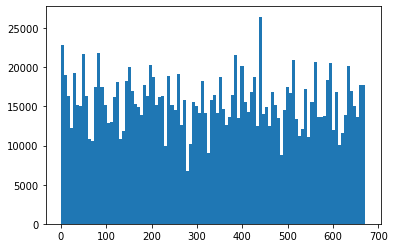

step


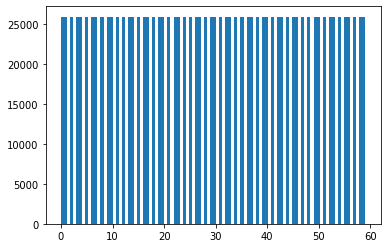

sensor_00


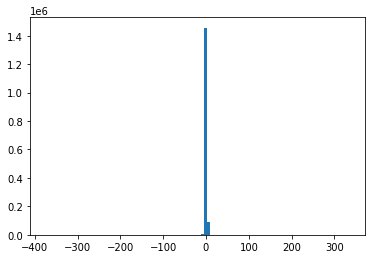

sensor_01


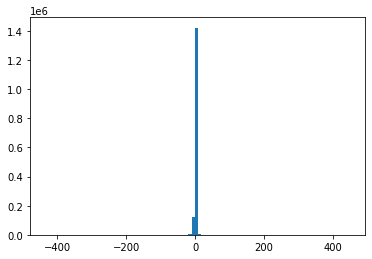

sensor_02


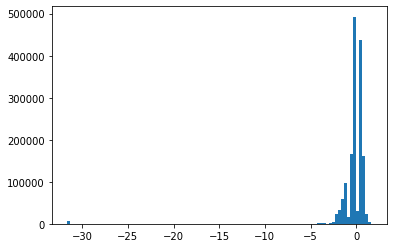

sensor_03


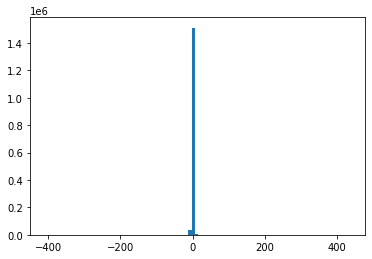

sensor_04


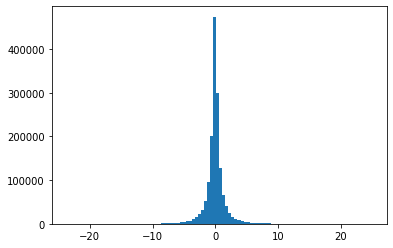

sensor_05


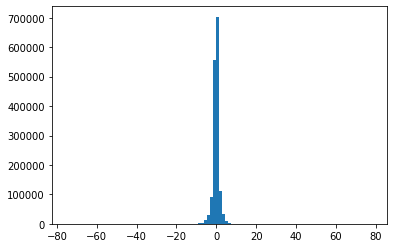

sensor_06


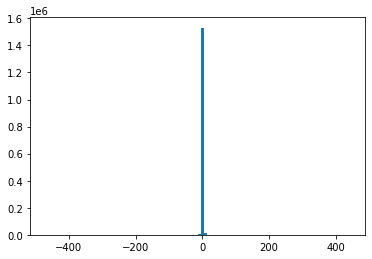

sensor_07


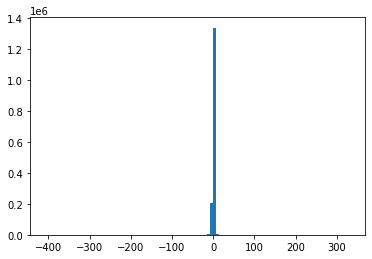

sensor_08


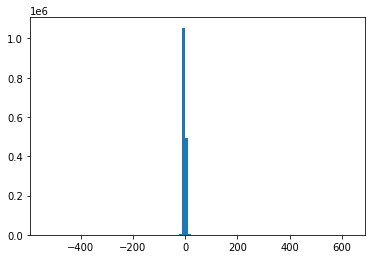

sensor_09


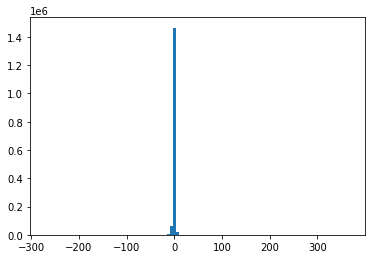

sensor_10


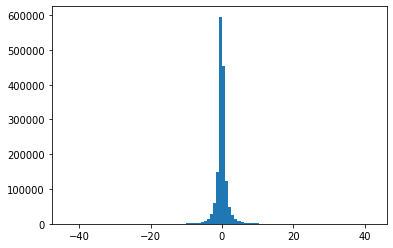

sensor_11


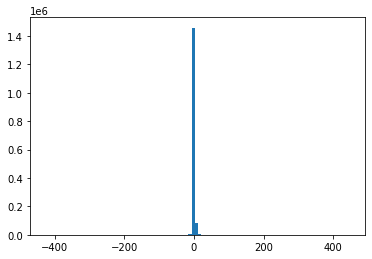

sensor_12


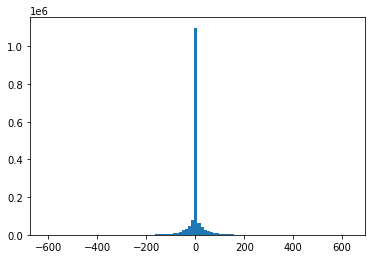

In [15]:
for column_name in train_df.columns:
    print(column_name)
    plt.hist(train_df[column_name], bins=100)
    plt.show()

# 1개 데이터의 13개 센서값 변동 보기

sensor_00


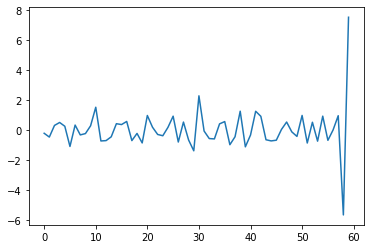

sensor_01


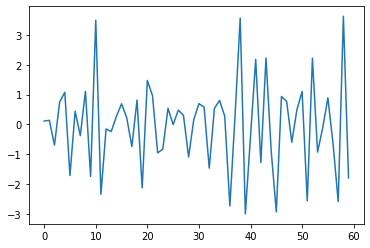

sensor_02


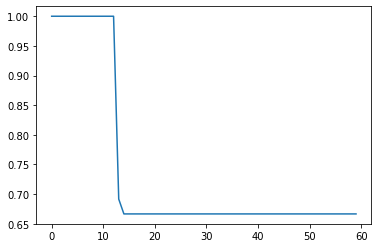

sensor_03


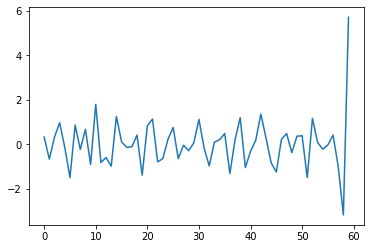

sensor_04


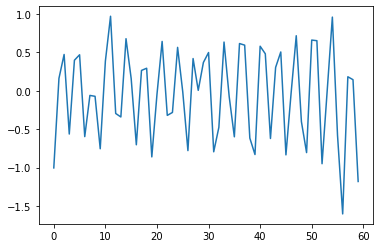

sensor_05


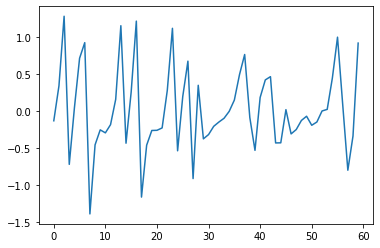

sensor_06


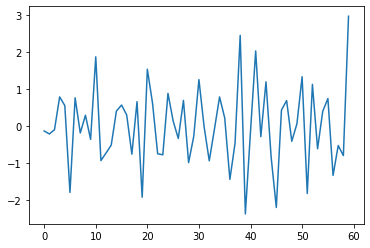

sensor_07


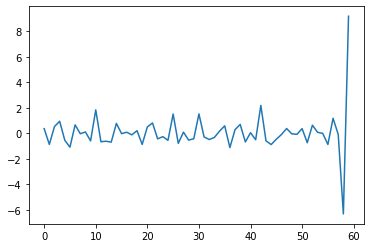

sensor_08


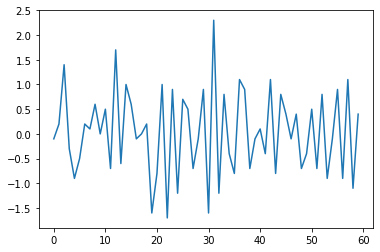

sensor_09


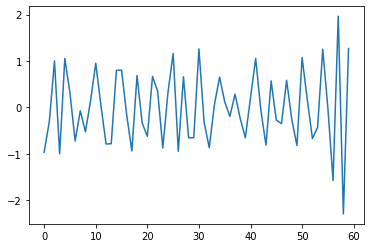

sensor_10


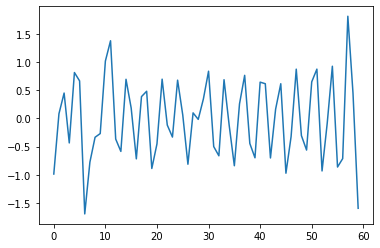

sensor_11


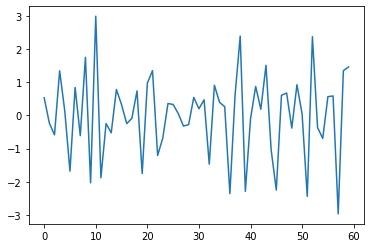

sensor_12


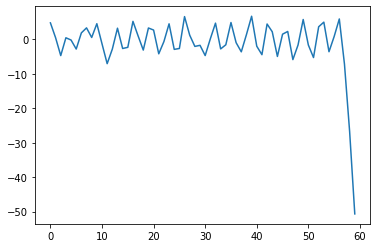

In [16]:
for i in range(SENSOR_COUNT):
    column_name = f'sensor_{i:02}'
    print(column_name)
    plt.plot(train_df[column_name][0:STEP_SIZE])
    plt.show()

# 특정 센서의 10개 데이터 보기

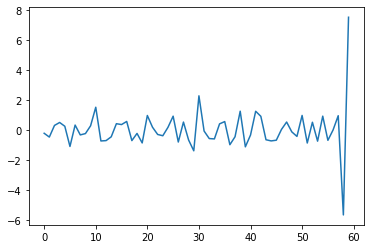

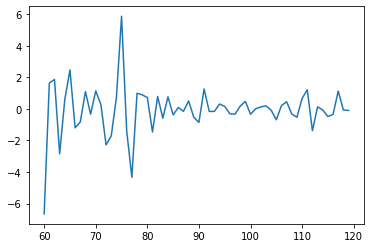

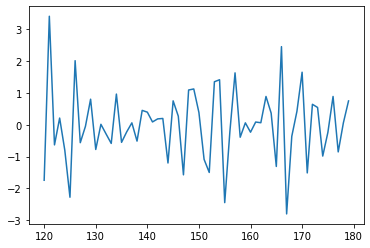

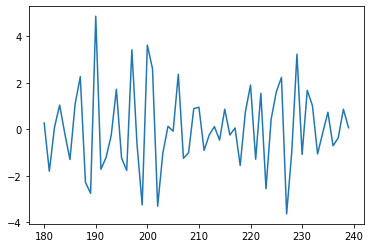

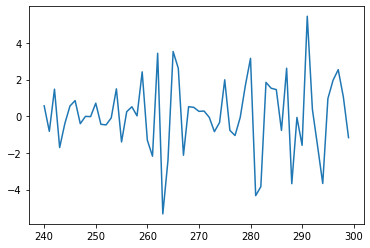

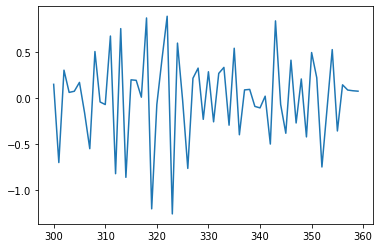

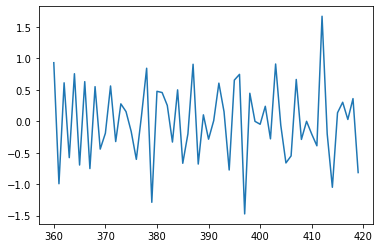

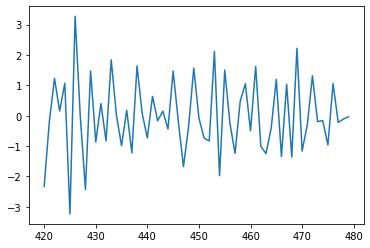

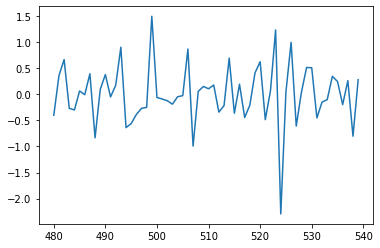

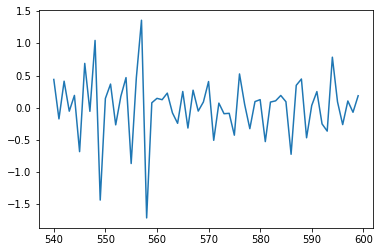

In [17]:
STEP_SIZE = 60

for i in range(10):
    column_name = f'sensor_00'
    plt.plot(train_df[column_name][STEP_SIZE*i:STEP_SIZE*(i+1)])
    plt.show()

# x, y 데이터 만들기

In [18]:
raw_train_data = train_df.to_numpy()
print(raw_train_data.shape)
raw_test_data = test_df.to_numpy()
print(raw_test_data.shape)
raw_all_data = np.vstack([raw_train_data, raw_test_data])
print(raw_all_data.shape)

(1558080, 16)
(733080, 16)
(2291160, 16)


In [19]:
TRAIN_DATA_COUNT = int(len(raw_train_data)/STEP_SIZE)
print(TRAIN_DATA_COUNT)

25968


In [20]:
DATA_SIZE = int(len(raw_all_data) / STEP_SIZE)
print(DATA_SIZE)

38186


In [21]:
x = np.empty((DATA_SIZE, STEP_SIZE*SENSOR_COUNT))
for i in range(DATA_SIZE):
    for j in range(STEP_SIZE):
        x[i,SENSOR_COUNT*j:SENSOR_COUNT*(j+1)] = raw_all_data[i*STEP_SIZE+j,3:]

In [22]:
print(x.shape)

(38186, 780)


In [23]:
raw_train_x = x[:TRAIN_DATA_COUNT]
raw_test_x = x[TRAIN_DATA_COUNT:]

In [24]:
raw_train_label = train_label_df.to_numpy()
raw_train_y = raw_train_label[:,1]
print(raw_train_y.shape)

(25968,)


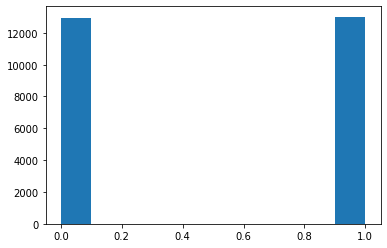

In [26]:
plt.hist(raw_train_y)
plt.show()

In [27]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# classifier들 준비

In [28]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [29]:
train_x, test_x, train_y, test_y = train_test_split(raw_train_x, raw_train_y, test_size=.4, random_state=42)

In [30]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(15580, 780)
(15580,)
(10388, 780)
(10388,)


In [31]:
train_x = train_x[:1000]
train_y = train_y[:1000]
test_x = test_x[:500]
test_y = test_y[:500]

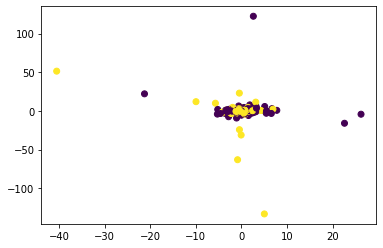

In [32]:
plt.scatter(train_x[:,0], train_x[:,1], c=train_y)
plt.show()

## Nearest Neighbors

In [33]:
clf = KNeighborsClassifier(3)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.504


## Linear SVM

In [34]:
clf = SVC(kernel="linear", C=0.025)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.554


## RBF SVM

In [35]:
clf = SVC(gamma=2, C=1)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.536


## Gaussian Process

In [36]:
clf = GaussianProcessClassifier(1.0 * RBF(1.0))
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.468


## Decision Tree

In [37]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.504


## Random Forest

In [38]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.526


## Neural Net

사용된 구조 : https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [39]:
clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.57


## AdaBoost

In [40]:
clf = AdaBoostClassifier()
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.566


## Naive Bayes

In [41]:
clf = GaussianNB()
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.54


## QDA

In [42]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.498


## XGBoost

In [43]:
from xgboost import XGBClassifier

clf=XGBClassifier()
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.552


## GBM

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.552


## light GBM

In [45]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=200)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.606


## LDA

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.528


## KNeighborsClassifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(score)

0.504
